In [10]:
import pandas as pd
import re
import matplotlib
from matplotlib import pyplot as plt
import statistics as st

In [11]:
data = pd.read_csv("url_info.csv")

In [12]:
data.head()

,covid,cardiopatia+isquemica,accidente+cerebrovascular,enfermedad+pulmonar+obstructiva+cronica,infecciones+vias+respiratorias+inferiores,afecciones+neonatales,cancer+traquea,cancer+bronquios,cancer+pulmon,alzheimer,enfermedad+diarreica,diabetes+melitus,nefropatia
0,"Aproximadamente 6.990.000.000 resultados (0,79...","Aproximadamente 102.000 resultados (0,58 segun...","Aproximadamente 4.360.000 resultados (0,40 seg...","Aproximadamente 185.000 resultados (0,44 segun...","Aproximadamente 405.000 resultados (0,53 segun...","Aproximadamente 11.200.000 resultados (0,29 se...","Aproximadamente 200.000 resultados (0,38 segun...","Aproximadamente 155.000 resultados (0,60 segun...","Aproximadamente 1.010.000 resultados (0,44 seg...","Aproximadamente 93.000.000 resultados (0,54 se...","Aproximadamente 261.000 resultados (0,57 segun...","Aproximadamente 44.800.000 resultados (0,76 se...","Aproximadamente 770.000 resultados (0,47 segun..."


In [13]:
covid = data["covid"][0].replace('.','')

In [16]:
#Pasar a enteros
number_results = int(re.findall(r'\d+', covid[0]))

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

In [6]:
number_results

6990000000

In [7]:
results_list = []
for disease in data:
    results_list.append(int(re.findall(r'\d+', data[disease][0].replace('.',''))[0]))
    

In [8]:
results_list

[6990000000,
 102000,
 4360000,
 185000,
 405000,
 11200000,
 200000,
 155000,
 1010000,
 93000000,
 261000,
 44800000,
 770000]

In [9]:
col_name = list(data.columns)
name = []
for e in col_name:
    name.append(e.replace('+',' '))

In [10]:
name

['covid',
 'cardiopatia isquemica',
 'accidente cerebrovascular',
 'enfermedad pulmonar obstructiva cronica',
 'infecciones vias respiratorias inferiores',
 'afecciones neonatales',
 'cancer traquea',
 'cancer bronquios',
 'cancer pulmon',
 'alzheimer',
 'enfermedad diarreica',
 'diabetes melitus',
 'nefropatia']

In [11]:
data_1 = pd.DataFrame({'disease': [name[0],name[1],name[2],name[3],name[4],name[5],name[6],name[7],name[8],name[9],name[10],name[11],name[12]],
                       'results': [results_list[0],results_list[1],results_list[2],results_list[3],results_list[4],results_list[5],results_list[6],results_list[7],results_list[8],results_list[9],results_list[10],results_list[11],results_list[12]]
                    }) 

data_1

,disease,results
0,covid,6990000000
1,cardiopatia isquemica,102000
2,accidente cerebrovascular,4360000
3,enfermedad pulmonar obstructiva cronica,185000
4,infecciones vias respiratorias inferiores,405000
5,afecciones neonatales,11200000
6,cancer traquea,200000
7,cancer bronquios,155000
8,cancer pulmon,1010000
9,alzheimer,93000000


In [12]:
#Necesario normalizar para poder hacer un gráfico comparativo
data_1['results'] = abs((data_1['results']-data_1['results'].mean())/(data_1['results'].std()))

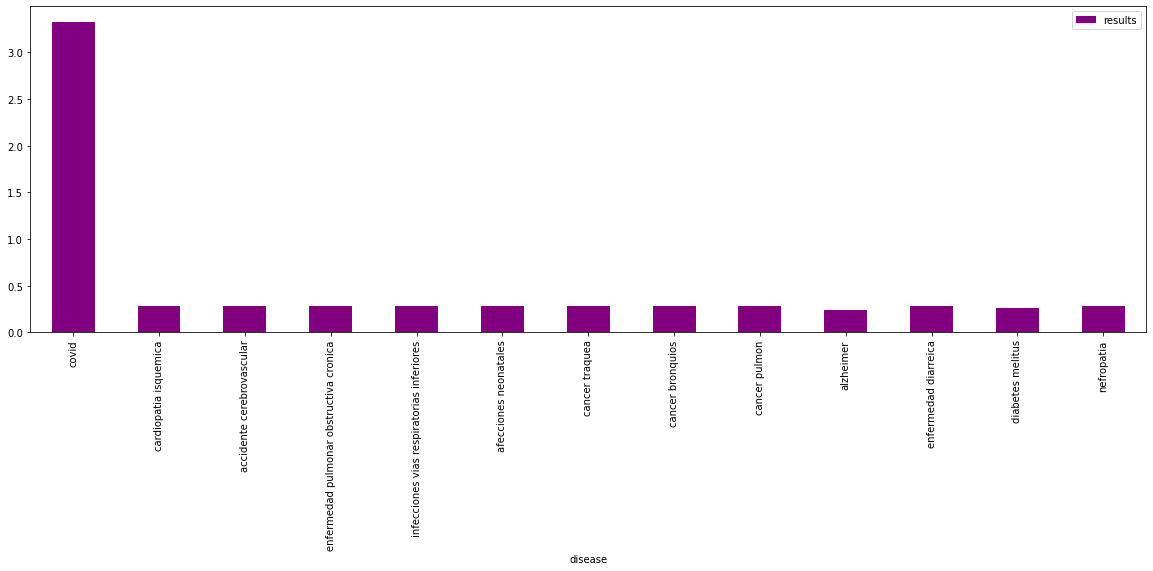

In [16]:
df = data_1
ax = df.plot.bar(x='disease', y='results', rot=90, figsize=(20,6), color='purple');